<a href="https://colab.research.google.com/github/ANKITVARMA11/Crime-analysis-LAPD/blob/main/Crime__Analysis_LAPD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import numpy as nm
import pandas as pd
import matplotlib as plt
import geopandas as gpd
%matplotlib inline

The data used for this analysis is obtained from the official government source of **United States of America**. The data in no manner is manipulated to create false analysis. Any resemblance during this analysis of any individual, group, community or locations is completely unintentional and just the result of the analysis.

The data source : [Data.gov](https://catalog.data.gov/dataset/crime-data-from-2020-to-present/resource/2957fec8-d080-46df-995b-d55287d9c24b?inner_span=True)

In [51]:
data = pd.read_csv("/content/drive/MyDrive/Crime_Data/Crime_Data_from_2020_to_Present.csv")

In [52]:
data.shape

(944235, 28)

In [53]:
data.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944235 entries, 0 to 944234
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           944235 non-null  int64  
 1   Date Rptd       944235 non-null  object 
 2   DATE OCC        944235 non-null  object 
 3   TIME OCC        944235 non-null  int64  
 4   AREA            944235 non-null  int64  
 5   AREA NAME       944235 non-null  object 
 6   Rpt Dist No     944235 non-null  int64  
 7   Part 1-2        944235 non-null  int64  
 8   Crm Cd          944235 non-null  int64  
 9   Crm Cd Desc     944235 non-null  object 
 10  Mocodes         811136 non-null  object 
 11  Vict Age        944235 non-null  int64  
 12  Vict Sex        817640 non-null  object 
 13  Vict Descent    817630 non-null  object 
 14  Premis Cd       944225 non-null  float64
 15  Premis Desc     943668 non-null  object 
 16  Weapon Used Cd  324477 non-null  float64
 17  Weapon Des

Since most of the required columns have Non-Null values, I will proceed with the analysis of those columns first. The data cleaning and pre-processing of remaining columns will be done later.

The area with most number of crimes committed can be treated as most unsafe area

In [55]:
most_unsafe_area = pd.value_counts(data['AREA NAME'])
most_unsafe_area = pd.DataFrame(most_unsafe_area)
most_unsafe_area.rename(columns = {"count":"Crime count"}, inplace = True)
print("The most 5 unsafe areas in Los Angeles are :")
most_unsafe_area.head()

The most 5 unsafe areas in Los Angeles are :


<ipython-input-55-cf63a74f39bf>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  most_unsafe_area = pd.value_counts(data['AREA NAME'])


,Crime count
AREA NAME,
Central,63732
77th Street,59228
Pacific,55020
Southwest,53464
Hollywood,49488


In [57]:
safest_areas = most_unsafe_area.tail()
print("The safest areas in Los Angeles are :")
safest_areas[::-1]

The safest areas in Los Angeles are :


,Crime count
AREA NAME,
Foothill,31463
Hollenbeck,34763
Mission,37817
Topanga,38925
Devonshire,39035


44963.57142857143

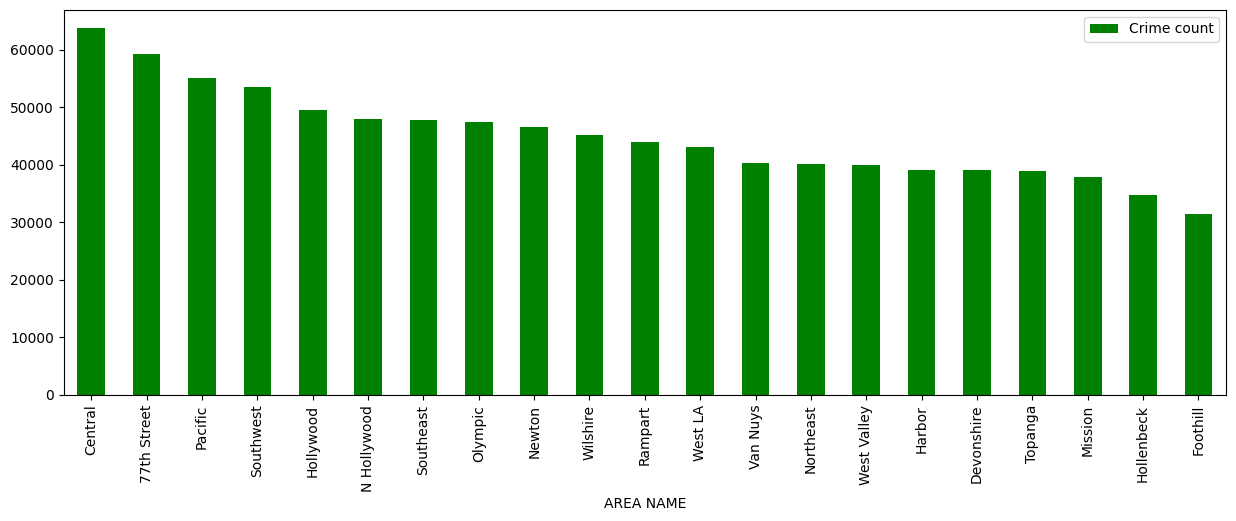

In [103]:
most_unsafe_area.plot.bar(figsize=(15,5),color='Green')

In [105]:
print(f"The average number of crimes per area is : {most_unsafe_area['Crime count'].mean()} ")

The average number of crimes per area is : 44963.57142857143 


**Analysis of Weaponized crimes**

In [114]:
data['Weapon Desc'].value_counts().head(50)

,count
Weapon Desc,
"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",173881
UNKNOWN WEAPON/OTHER WEAPON,35291
VERBAL THREAT,23739
HAND GUN,19968
SEMI-AUTOMATIC PISTOL,7203
KNIFE WITH BLADE 6INCHES OR LESS,6802
UNKNOWN FIREARM,6534
OTHER KNIFE,5852
MACE/PEPPER SPRAY,3724
